In [22]:
%matplotlib inline
import pickle, os
from nnet_core import *
from dataset_mgmt import *
import matplotlib.pyplot as plt

generate = False; write = False; read = True;
filename = "trained_network.pickle"

netw = []
_, test_set = load_data(10, 1000, test_size=200);
if generate: 
    netw = nnet_train_new(13, 9, 1.12, 0.0003, 24, 0, 11, 880, 3, 500);
if read:
    file = open(filename, 'rb')
    netw = pickle.load(file)
    file.close()
if write:
    if os.path.exists(filename): os.remove(filename)
    file = open(filename, 'ab+')
    pickle.dump(netw, file)
    file.close()

0.662
0.66
0.654


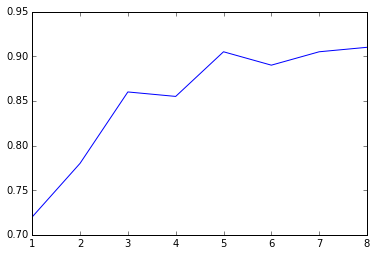

In [25]:
def sort(net):
    return sorted(net, key=lambda x: x[2])[::-1]

def of_n_pick_m(n, m):
    return sort(netw[0:n])[0:m]

def plot_of_n(n):
    index = []; eff = []
    for m in range(1, n):
        working_net = of_n_pick_m(n, m);
        index.append(m)
        eff.append(nnet_evaluate_multiple(working_net, test_set)[2])
    plt.plot(index, eff)
    
    
plot_of_n(9)
    
npx = of_n_pick_m(5, 3)
for i in range(0, len(npx)):
    print(npx[i][2])